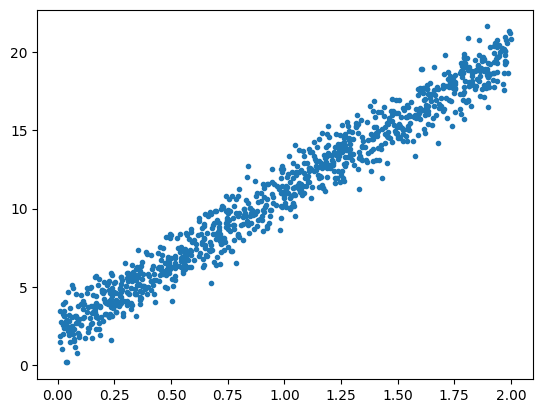

In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


np.random.seed(42)

samples = 1000

X = 2*np.random.rand(samples, 1)
y = 2+9*X+np.random.randn(samples, 1)

plt.plot(X,y,'.')

In [34]:
X = np.c_[np.ones((samples, 1)), X]
X[:5]

array([[1.        , 0.74908024],
       [1.        , 1.90142861],
       [1.        , 1.46398788],
       [1.        , 1.19731697],
       [1.        , 0.31203728]])

In [35]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [ ]:
def gradient_descent(X, y, learning_rate = .1, iterations = 100):
    m = len(X)

    theta = np.random.randn(X.shape[1],1)
    #print(f"Initialize theta with randomized\n {theta}")

    for _ in range(iterations):
        gradient = 2/m*X.T@(X @ theta-y)
        theta -= learning_rate*gradient

    return theta

theta = gradient_descent(X_train, y_train)
theta.reshape(-1)

array([2.30131811, 8.83236313])

In [37]:
steps = range(1,200,1)
thetas = [gradient_descent(X,y , iterations=iteration).reshape(-1) for iteration in steps]
thetas = np.array(thetas)
thetas.shape

(199, 2)

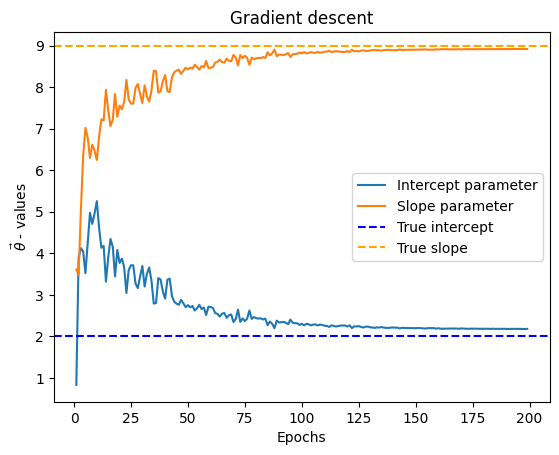

In [39]:
fig, ax = plt.figure(dpi=100), plt.axes()
ax.plot(steps, thetas, label = ["Intercept parameter", "Slope parameter"])
ax.axhline(y=2, color='b', linestyle='--', label="True intercept")
ax.axhline(y=9, color='orange', linestyle='--', label="True slope")
# one epoch is when algorithm seen the whole data once
ax.set(xlabel = "Epochs", ylabel = r"$\vec{\theta}$ - values", title="Gradient descent" )
ax.legend()
plt.show()

In [ ]:
# Stochastic Gradient Descent(SGD)

epochs = 10
t0, t1 = 5, 50

def learning_rate_schedule(t):
    return t0/(t+t1)

theta = np.random.randn(2,1)

m = len(X_train)

for epoch in range(epochs):
    for i in range(m):
        random_index = np.random.randint(m)
        x_i = X_train[random_index:random_index+1]
        y_i = y_train[random_index:random_index+1]
        gradients = 2*x_i.T.dot(x_i.dot(theta) - y_i)
        eta = learning_rate_schedule(epoch*m+i)
        theta -= eta*gradients
theta

array([[2.23055388],
       [8.86956001]])

In [46]:
y_pred = X_test@theta

MAE = np.mean(np.abs(y_test-y_pred))
MSE = np.mean(np.square(y_test-y_pred))
RMSE = np.sqrt(MSE)

MAE, MSE, RMSE

(0.7496138076092568, 0.90281014088734, 0.9501632180248507)